## 7. 연속형 확률변수
### - 1차원 연속형 확률변수
### - 2차원 연속형 확률변수

* 연속형 확률변수의 경우 적분이 포함되는 등 이산형에 비해 식이 조금 까다로울 수 있음

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

from scipy import integrate # 적분 구현
import warnings # integral 계산 결과에 문제가 없다는 warning 출력 막아주기 위함

warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

#### 1. 1차원 연속형 확률변수
* 연속형 확률변수 = 확률변수가 취할 수 있는 값이 연속적인 확률변수
* 1차원 연속형 확률변수의 정의
  - 확률밀도함수(probability density function, PDF) (=밀도함수)
    + ${P(x_0 \leq X \leq x_1)} = {\int_{x_0}^{x_1} f(x)dx}$
  - 누적분포함수(cumulative distribution function, CDF) (=분포함수)
    + $F(x) = P(X \leq x) = {\int_{-\infty}^{x} f(x)dx}$

* 1차원 연속형 확률변수의 지표
  - 기댓값: $\mu = E(X) = {\int_{-\infty}^{\infty} xf(x)dx}$
  - 분산: $\sigma^2 = V(X) = {\int_{-\infty}^{\infty} {(x-\mu)^2}f(x)dx}$

In [2]:
x_range = np.array([0,1]) # 취할 수 있는 값의 구간 정의

In [3]:
# 확률밀도함수
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [4]:
# 확률분포
X = [x_range, f]

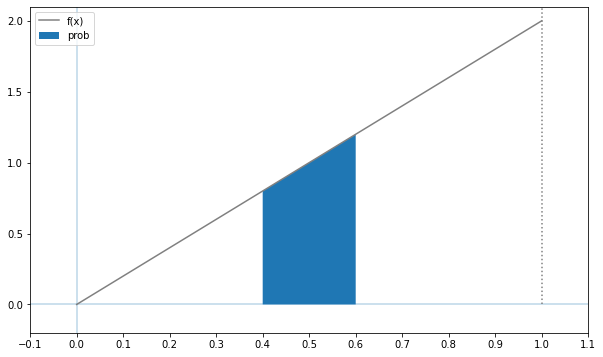

In [5]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [6]:
# integrate의 quad함수 활용 -> 적분값, 추정오차 반환
# 첫 번째 인수는 피적분함수, 두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

##### 확률의 성질
연속형 확률변수에서는 확률의 성질로 다음 두 식을 만족해야 함.
* $f(x) \geq 0$
* $
\int_{-\infty}^\infty f(x)dx = 1
$
* 첫 번째 조건 -> scipy.optimize의 minimize_scalar 활용 (최솟값 구하는 함수)
* 두 번째 조건 -> $-\infty$부터 $\infty$까지 적분한 결과가 1이라는 것 => 삼각형 면적이 1이 되는 것

In [7]:
# 확률의 성질(1)
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [8]:
# 확률의 성질(2)
# 무한대 -> np.inf
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [9]:
# 누적분포함수
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

* $P(0.4 \geq X \geq 0.6) = F(0.6) - F(0.4)$

In [10]:
F(0.6) - F(0.4)

0.200

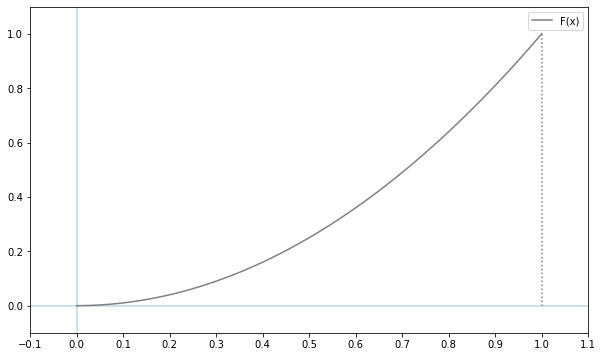

In [11]:
# F(x) -> 반드시 단조증가함수(x가 증가할 때 y는 감소하지 않는 함수)가 됨
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

##### 확률변수의 변환
* Y = 2X+3 (Y도 연속형 확률변수가 됨)
*
$
g(y) = 
\begin{cases}
{(y-3) \over 2} \ (3 \leq y \leq 5)\\
0 \ (otherwise)
\end{cases}
$
* $G(y) = P(Y \leq y) = {\int_{-\infty}^{y} g(y)dy}$

In [12]:
y_range = [3,5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3) / 2
    else:
        return 0
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

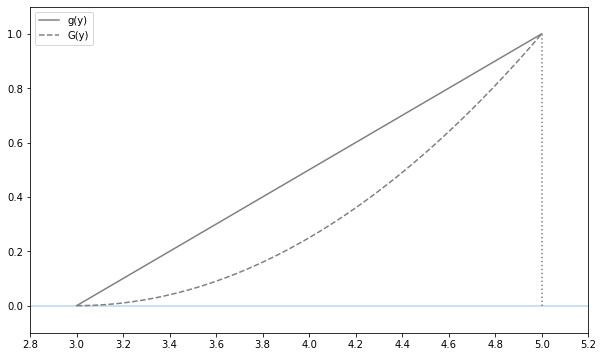

In [13]:
# 밀도함수 g(y), 분포함수 G(y)를 동시에 그리기
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8,5.2)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

In [14]:
# 기댓값(1)
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

##### 연속형 확률변수의 기댓값
* $E(g(X)) = {\int_{-\infty}^{\infty} g(x)f(x)dx}$

In [15]:
# 기댓값의 함수
def E(X, g=lambda x: x):
    x_range, f=X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [16]:
E(X)

0.667

In [17]:
E(X, g=lambda x: 2*x+3)

4.333

In [18]:
# 기댓값의 선형성
# E(2X+3) = 2E(X)+3
2 * E(X) + 3

4.333

In [19]:
# 분산
mean = E(X)
def integrand(x):
    return (x - mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

##### 연속형 확률변수의 분산
* $V(g(X)) = {\int_{-\infty}^{\infty} {(g(x) - E(g(X)))^2}f(x)dx}$

In [20]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [21]:
V(X)

0.056

In [22]:
V(X, lambda x: 2*x + 3)

0.222

In [23]:
# 분산의 공식
# V(2X+3) = 4V(X)
2**2 * V(X)

0.222

#### 2. 2차원 연속형 확률변수
* 2차원 연속형 확률변수의 정의
  - 결합확률밀도함수
    + $P({x_0 \leq X \leq x_1}, {y_0 \leq Y \leq y_1}) = {{\int_{x_0}^{x_1}\int_{y_0}^{y_1}} f(x,y)dxdy}$
  - 주변확률밀도함수 (=주변밀도함수)
    + $f_X(x) = {\int_{- \infty}^{\infty}} f(x,y)dy$
* 2차원 연속형 확률변수의 지표
  - 기댓값: ${\mu_X} = E(X) = {\int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}}} {xf(x,y)dxdy} $
  - 분산: ${\sigma^2} = V(X) = {\int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}}} {{(x - \mu_X)}^2} f(x,y)dxdy $
  - 공분산: ${\sigma_XY} = Cov(X,Y) = {\int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}}} {(x - \mu_X)(y - \mu_Y)}f(x,y)dxdy $

##### 확률의 성질
2차원 연속형 확률변수에서는 확률의 성질로 다음 두 식을 만족해야 함.
* $f(x,y) \geq 0$
* ${{\int_{- \infty}^{\infty}\int_{- \infty}^{\infty}} f(x,y)} = 1$

In [24]:
# X와 Y가 취할 수 있는 값을 각각 정의
x_range = [0,2]
y_range = [0,1]

In [25]:
# 결합확률밀도함수
def f_xy(x,y):
    if 0 <= y <= 1 and 0 <= x-y <= 1:
        return 4 * y * (x-y)
    else:
        return 0

In [26]:
# 확률변수의 움직임
XY = [x_range, y_range, f_xy]

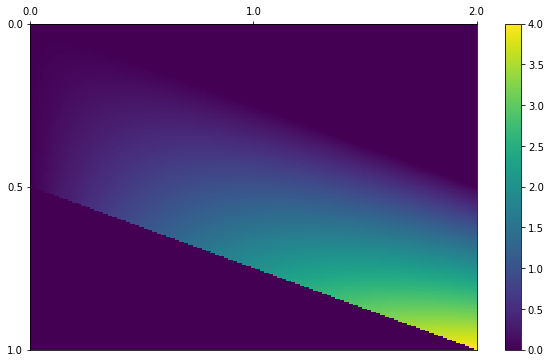

In [27]:
# 히트맵
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor=False)
ax.set_yticks(np.linspace(0,200,3), minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)

plt.show()

In [28]:
# 다중적분 -> integrate.nquad활용
# 첫 번째 인수는 피적분함수, 두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                [-np.inf, np.inf]])[0]

1.326

In [29]:
# 주변확률밀도함수
# integrate에는 2변수함수 중 1변수만 적분하는 함수 X
# functools의 partial 활용 -> 인수의 일부를 고정한 새로운 함수를 만들 수 있는 함수
# ex. partial(f_xy, x) -> x가 고정되고 y만으로 된 함수가 반환
# 이후 y로 적분 => X의 주변확률밀도함수 구할 수 있음
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy,x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [30]:
X = [x_range, f_X]
Y = [y_range, f_Y]

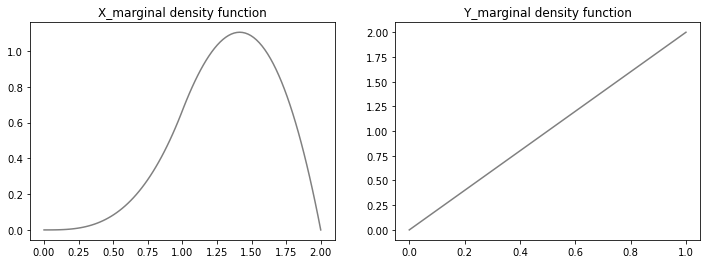

In [31]:
# 밀도함수 그리기
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

In [32]:
# 기댓값
def integrand(x,y):
    return x * f_xy(x,y)

integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

0.863

##### 2차원 연속형 확률변수의 기댓값
* $E(g(X,Y)) = {\int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}}} {g(x,y)f(x,y)dxdy}$

In [33]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y) * f_xy(x,y)
    
    return integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

In [34]:
mean_X = E(XY, lambda x,y: x)
mean_X

0.863

In [35]:
mean_Y = E(XY, lambda x,y: y)
mean_Y

0.000

In [36]:
# 기댓값의 선형성
a, b =2, 3

In [37]:
E(XY, lambda x,y: a*x + b*y)

4.749

In [38]:
a * mean_X + b * mean_Y

1.727

In [39]:
# 분산
def integrand(x,y):
    return (x-mean_X)**2 * f_xy(x,y)

integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

0.006

##### 2차원 연속형 확률변수의 분산
* $V(g(X,Y)) = {\int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}}} {(g(x,y) - E(g(X,Y)))^2}f(x,y)dxdy$

In [40]:
def V(XY, g):
    x_range, y_range, f_XY = XY
    mean = E(XY, g)
    def integrand(x,y):
        return (g(x,y) - mean)**2 * f_xy(x,y)
    
    return integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

In [41]:
var_X = V(XY, lambda x,y: x)
var_X

0.006

In [42]:
var_Y = V(XY, lambda x,y: y)
var_Y

1.689

In [43]:
# 공분산
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x,y: x)
    mean_Y = E(XY, lambda x,y: y)
    def integrand(x,y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x,y)
    
    return integrate.nquad(integrand,[[-np.inf,np.inf],[-np.inf,np.inf]])[0]

In [44]:
cov_xy = Cov(XY)
cov_xy

-0.000

In [45]:
# 분산과 공분산의 공식
V(XY, lambda x,y: a*x + b*y)

0.824

In [46]:
# V(2X+3Y) = 4V(X) + 9V(Y) +12Cov(X,Y)를 확인
a**2 * var_X + b**2 * var_Y + 2*a*b + cov_xy

27.224

In [47]:
# 상관계수
cov_xy / np.sqrt(var_X * var_Y)

-0.0005592310657045